> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: NO-show appointments (Xavier Horion)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib

Using matplotlib backend: Qt5Agg


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
MainData = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")

#   Some display to understand size and volume of data
print ('Size & shape of the data frame')
print ('Size :', MainData.size, ' - Shape : ', MainData.shape)
print ('with ', len(MainData), ' lines & with ', len(MainData.columns), ' columns')
print ('                      ')

print ('Structure of the data frame')
print (MainData.dtypes)
# print (MainData.info)
print ('                      ')

print ('Display the first 2nd element, the 10th and the last 2 elements')
print (MainData.head(2))
#print (MainData.iloc[9])
#print (MainData.tail(2))
print ('                      ')

print ('Display the average age')
print (MainData['Age'].mean())
print ('                      ')

print ('Any NaN data')
print (len (MainData.dropna(how = 'any')))
print ('       Wouh - all lines contain at least one NaN value .....        ')

#print ('Display the information about numerical column')
#print (MainData.describe())
#print ('                      ')

Size & shape of the data frame
Size : 1547378  - Shape :  (110527, 14)
with  110527  lines & with  14  columns
                      
Structure of the data frame
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object
                      
Display the first 2nd element, the 10th and the last 2 elements
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  J

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [26]:
# A function to convert the "No-Show" object into a bool
def f_NoShow(row):
    if row['No-show'] == "Yes":
        val = True
    else:
        val = False
    return val

# A function to convert the "Gender" object into a bool
def f_IsMan(row):
    if row['Gender'] == "M":
        val = True
    else:
        val = False
    return val

In [34]:
# Exploring the "No-Show" object & re-formating it into 'IsCancelled' new column
print ('Value we found on column No-Show : ', set(MainData['No-show']) )

# I've tried ines below without success => placed in comment and switch to a function
# MainDataWithIsCancelled = MainData.assign(IsCancelled = MainData['AppointmentDay'].bool())

# Creating a new column with bool format
MainData['IsCancelled'] = MainData.apply(f_NoShow, axis=1)
print ('Type and values we found about column IsCancelled : ', MainData.IsCancelled.dtypes, ' - Values: ',set(MainData['IsCancelled']))
print ('Average of IsCancelled', MainData.IsCancelled.mean())
print (' ')

# Exploring the "Gender" object & re-formating it into 'Is_a_Man' new column
print ('Value we found on column Gender : ', set(MainData['Gender']))

# So I try with the function astype on gender => I've let this in comment...
# ... and create a function
#MainData['Gender'] = MainData['Gender'].astype('str')
#print ('Average of Gender', MainData.Gender.mean())

MainData['Is_a_Man'] = MainData.apply(f_IsMan, axis=1)
print ('Type of column Is_a_Man : ', MainData.Is_a_Man.dtypes)
print ('How many men ?', MainData.loc[:, ['Gender','Is_a_Man']].groupby(['Is_a_Man']).count())

Value we found on column No-Show :  {'Yes', 'No'}
Type and values we found about column IsCancelled :  bool  - Values:  {False, True}
Average of IsCancelled 0.201932559465
 
Value we found on column Gender :  {'M', 'F'}
Type of column Is_a_Man :  bool
How many men ?           Gender
Is_a_Man        
False      71840
True       38687


In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# We will not investigate the impact if the appointement is on a MO/TU/..Sunday or has been taken on ...
# We will investigate if influende about leadtime between ScheduledDay & AppointmentDay
# Issue on the two lies below (notably about convetion string to date)
# MainData['LeadTime']= MainData['AppointmentDay']-MainData['ScheduledDay']
# MainDataWithLeadtime = MainData.assign(E = MainData['AppointmentDay'] - MainData['ScheduledDay'])                   ')

# Creation of a column to synthesis all health situaiton per individual
MainData['Complexity']= MainData['Handcap']+ MainData['Hipertension'] + MainData['Diabetes'] + MainData['Alcoholism']
print (MainData.Handcap.describe())
print (MainData.Complexity.describe())

count    110527.000000
mean          0.022248
std           0.161543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handcap, dtype: float64
count    110527.000000
mean          0.321758
std           0.631381
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Complexity, dtype: float64


In [15]:
#Check that all values in column 'SMS_received' are int64 with only values 0 & 1
print ('Value we found on column SMS_received : ', set(MainData['SMS_received']) )

# This line doesn't work ...
# MainData['IsSMS_received']= MainData['SMS_received'].bool

# So I try with the function astype
MainData['SMS_received'] = MainData['SMS_received'].astype('bool')
print ('New type of column SMS_received after conversion: ', MainData.SMS_received.dtypes)
print ('Average of SMS_received', MainData.SMS_received.mean())
print (' ')


Value we found on column Gender :  {'M', 'F'}
 
New type of column Gender after conversion:  object
Value we found on column SMS_received :  {0, 1}
New type of column SMS_received after conversion:  bool
Average of SMS_received 0.321025631746
 
Value we found on column No-Show :  {'Yes', 'No'}
Type and values we found about column IsCancelled :  bool  - Values:  {False, True}
Average of IsCancelled 0.201932559465
 


In [16]:
#deletion of column we won't use on next steps
# I've been said that neighboorhood has no impact => deletion of the column
del MainData['Neighbourhood']
del MainData['Scholarship']
del MainData['Hipertension']
del MainData['Diabetes']
del MainData['Alcoholism']
del MainData['Handcap']

#delation of "NO-show" as replaced by 'IsCancelled'
del MainData['No-show']
print ('NEW structure of the data frame')
print (MainData.dtypes)
print (' ')

NEW structure of the data frame
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
SMS_received         bool
Complexity          int64
IsCancelled          bool
dtype: object
 


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [17]:
# Just before trying to answer to the both selected questions
# Let's have a look with the basic Python function
print ('Display result of corr on MainData')
print (MainData.corr()) 
print ('                                  ')


Display result of corr on MainData
               PatientId  AppointmentID       Age  SMS_received  Complexity  \
PatientId       1.000000       0.004039 -0.004139     -0.009749   -0.002434   
AppointmentID   0.004039       1.000000 -0.019126     -0.256618    0.029860   
Age            -0.004139      -0.019126  1.000000      0.012643    0.483631   
SMS_received   -0.009749      -0.256618  0.012643      1.000000   -0.023193   
Complexity     -0.002434       0.029860  0.483631     -0.023193    1.000000   
IsCancelled    -0.001461      -0.162602 -0.060319      0.126431   -0.030318   

               IsCancelled  
PatientId        -0.001461  
AppointmentID    -0.162602  
Age              -0.060319  
SMS_received      0.126431  
Complexity       -0.030318  
IsCancelled       1.000000  
{False, True}
                                  


In [21]:
#Investigaiton on correlation about gender & Cancellation rate 
print ('Cancelation rate Man')

# print (MainData["Gender"=="M"].loc[:,"IsCancelled"].mean())

#Exemple found: df.loc[:, ['A', 'B']].groupby('A').count()
print (MainData.loc[:, ['IsCancelled', 'Gender']].groupby('Gender').mean())

Cancelation rate Man
        IsCancelled
Gender             
F          0.203146
M          0.199679


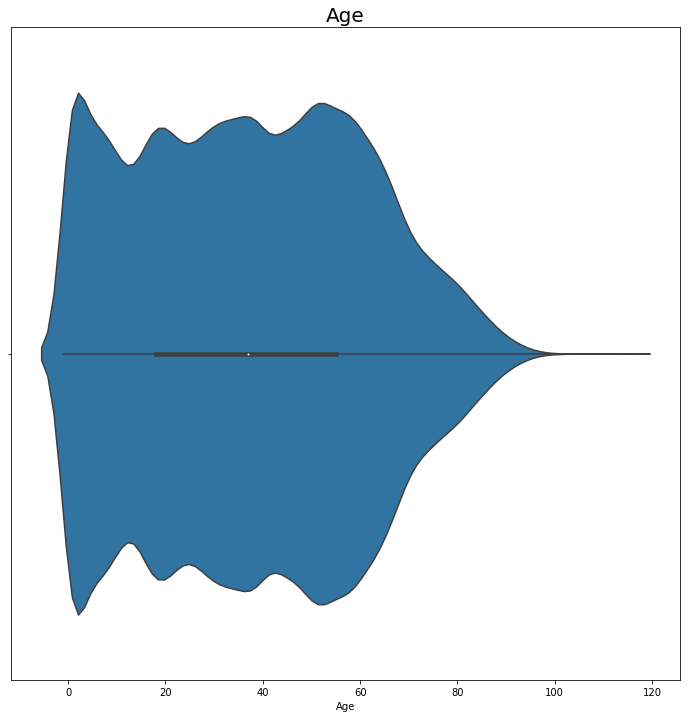

In [39]:
#give the figure size
plt.figure(figsize=(12,12))
#plotting what needs to be plotted
sns.violinplot(MainData['Age'])
#title of a the plot
plt.title('Age',fontsize = 20)
#publishing the plot
plt.show()

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Is there a relation between cancelation rate and gender ?
# Establish average cancellation for men & wowen


### Research Question 2  (Replace this header name!)

Cancelation rate related to SMS_received
              IsCancelled
SMS_received             
False            0.167033
True             0.275745


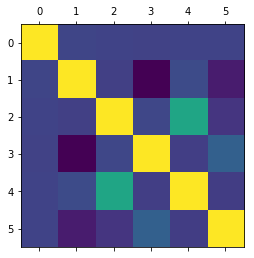

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Investigation on correlation about SMS_received & Cancellation rate 
print ('Cancelation rate related to SMS_received')

#Exemple found: df.loc[:, ['A', 'B']].groupby('A').count()
print (MainData.loc[:, ['IsCancelled', 'SMS_received']].groupby('SMS_received').mean())

# Is there a relation between cancelation rate and SMS_Received ?
plt.matshow(MainData.corr())

In [ ]:
# Conclusion
# gald to submmit this first project
# I've found correlation between "No-Show" and the fact that people received SMS

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])